## Scikit Learn dataset module.

Has some pre-defined datasets for example. We are now working with 'THE DIGIT DATASET'. It has 1797 images of 8 * 8.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
digits = load_digits() # Loading datasets.

In [3]:
dir(digits) # What this training set contains.

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
# Accessing first element.
digits.data[0] # Image is represented as one dimensional array.

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

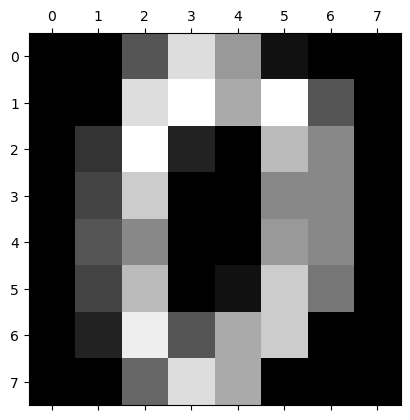

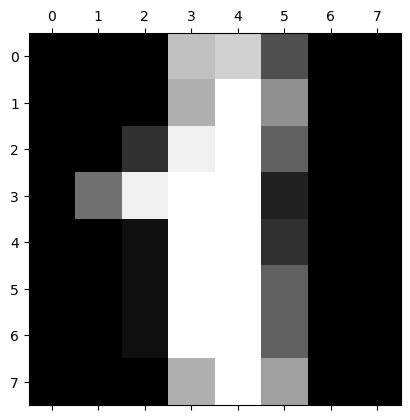

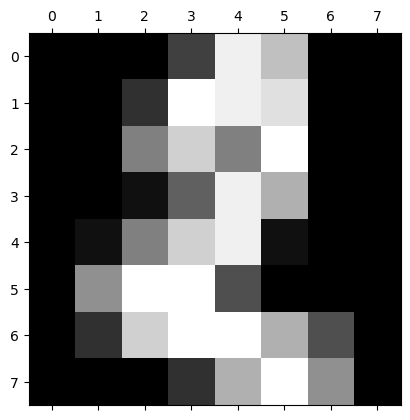

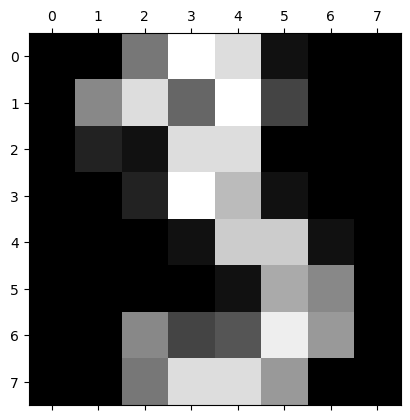

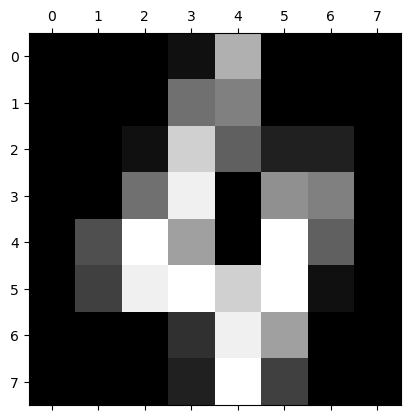

In [5]:
plt.gray()

for i in range(5):
    plt.matshow(digits.images[i]) # Inputs

In [6]:
digits.target[0:5] # Output

array([0, 1, 2, 3, 4])

## Training model

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [9]:
len(X_train)

1437

In [10]:
len(X_test)

360

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [12]:
model.fit(X_train, Y_train)

D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Measuring accuracy of the model.

In [13]:
model.score(X_test, Y_test)

0.9583333333333334

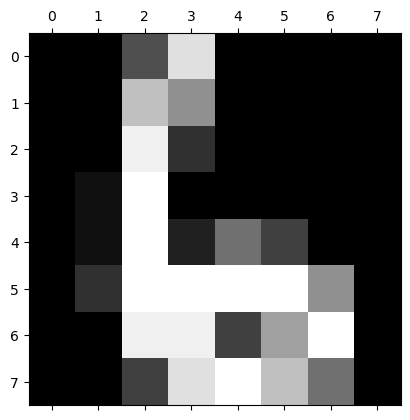

In [14]:
plt.matshow(digits.images[67])

In [15]:
digits.target[67]

6

In [16]:
model.predict([digits.data[67]])

array([6])

In [17]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

# Confusion matrix

In [18]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_predicted)
cm

array([[35,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  1,  0,  0,  0,  0,  1],
       [ 0,  1, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 39,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0, 36,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 31,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 37,  1,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 37,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 26]], dtype=int64)

## Visualising.

Helps to visualize where our model failed to predict.

Text(95.72222222222221, 0.5, 'Truth')

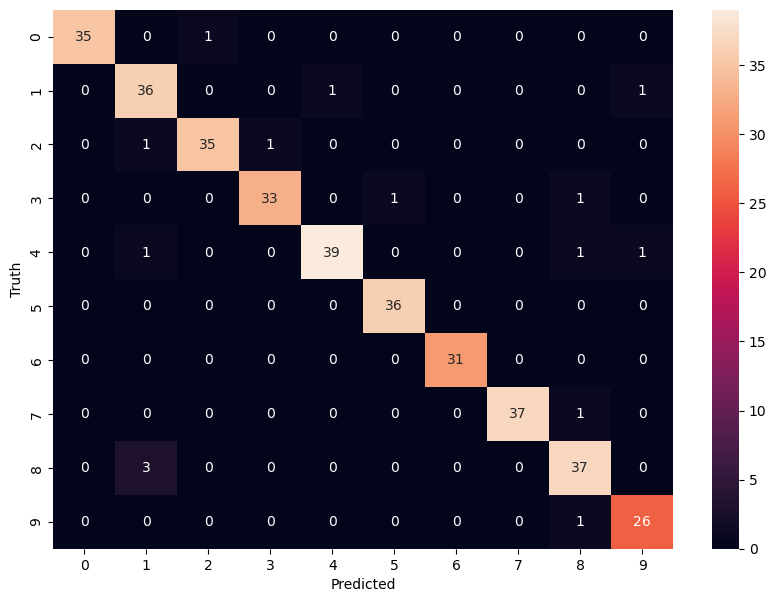

In [19]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Explanation.

From the left top,here 35 means 35 times I fed my model 0 and 35 times it predicted 0. 
Again, in left bottom, 3 times I fed my model 8 but it everytime it predicted 1.